# Project 6 Part B

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

## 2.1:  Process and explore data

In [126]:
dataset_path = "common_words.csv"
# TODO 2.1.1 Read and display information

#read CSV file "common_words.csv" and load it into a dataframe df
df= pd.read_csv("common_words.csv") #read_csv reads the file
#display the first 10 rows of the Dataframe, from column ID to Origin
display(df.loc[0:9, 'ID':'Origin']) 

,ID,Word,Part of Speech,Meaning,Phonetics,Origin
0,1,about,preposition,Concerning; on the subject of,/əˈbaʊt/,Old English
1,2,ask,verb,To request something from someone,/æsk/,Old English
2,3,at,preposition,Expressing location or arrival in a particular...,/æt/,Old English
3,4,be,verb,To exist or live,/biː/,Old English
4,5,big,adjective,"Of considerable size, extent, or intensity",/bɪɡ/,Middle English
5,6,by,preposition,Identifying the agent performing an action,/baɪ/,Old English
6,7,cafe,noun,A small restaurant selling light meals and drinks,/ˈkæfeɪ/,French
7,8,call,verb,To give someone a name or title,/kɔːl/,Old Norse
8,9,case,noun,An instance of a particular situation or event,/keɪs/,Latin
9,10,child,noun,A young human being below the age of puberty,/tʃaɪld/,Old English


In [127]:
# TODO 2.1.2: Define function count_matches and use it to answer the questions stated
#             in the project description.

def count_matches(dataframe, columnname, target):
    count = 0 #initialize counter for the matches
    num_columns = dataframe.shape[1] #get just the number of columns
    #Loop through each value in the specified column of the Dataframe
    for value in dataframe[columnname]:
        if value == target:
            count +=1 #Increment if there is a match
    return count #return total count of matches
print(f'Number of nouns: {count_matches(df, "Part of Speech", "noun")}')
print(f'Number of words with 2 syllables: {count_matches(df, "Syllables", 2)}')
print(f'Number of words with Old English origin: {count_matches(df, "Origin", "Old English")}')
print(f'Number of verbs: {count_matches(df, "Part of Speech", "verb")}')

Number of nouns: 23
Number of words with 2 syllables: 10
Number of words with Old English origin: 67
Number of verbs: 20


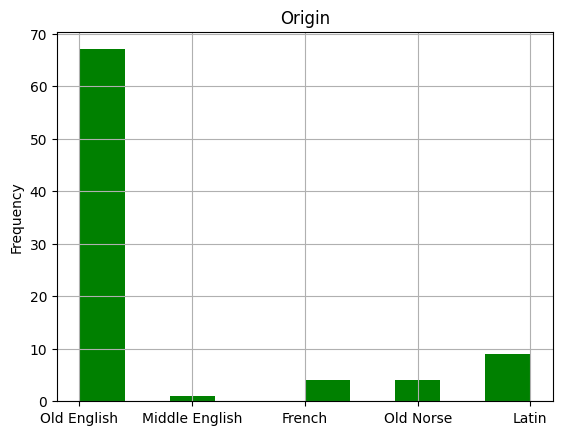

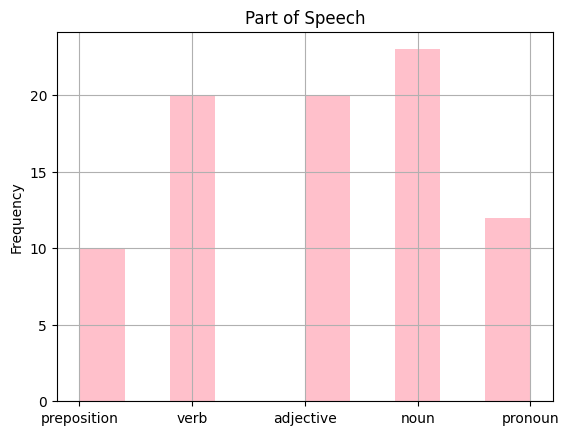

In [128]:
# TODO 2.1.3: Draw histograms

#create a histogram for the "Origin" column
df["Origin"].hist(color="green")
plt.title('Origin')
plt.ylabel('Frequency')
plt.show() #display the first histogram
#create a histogram for the "Part of Speech" column
df["Part of Speech"].hist(color="pink")
plt.title("Part of Speech")
plt.ylabel('Frequency')
plt.show() #display the second histogram

In [129]:
# TODO 2.1.4: Filter data and possibly rearrange the columns

def apply_filter(dataframe, columnname, value):
    #filter the data to only include rows where the value in the specified column matches
    filtered_df = dataframe[dataframe[columnname] == value]  
    columnnames= dataframe.columns
    listofcolumns= columnnames.tolist() #convert to a list
    #create a new list of columns w the filtered column first, followed by the rest
    new_list_of_columns = [columnname]
    for item in listofcolumns[0:8]: #limit to the first 8 columns
        if item != columnname:
            new_list_of_columns.append(item)
    #display with the filtered dataframe with the specified columns in the new order
    display(filtered_df[new_list_of_columns])

apply_filter(df, "Origin", "Old Norse")
apply_filter(df, "Syllables", 3)
apply_filter(df, "Characters", 7)

,Origin,ID,Word,Part of Speech,Meaning,Phonetics,Characters,Syllables
7,Old Norse,8,call,verb,To give someone a name or title,/kɔːl/,4,1
21,Old Norse,22,get,verb,To obtain or acquire,/ɡɛt/,3,1
63,Old Norse,64,take,verb,To lay hold of something,/teɪk/,4,1
73,Old Norse,74,want,verb,To desire or wish for something,/wɒnt/,4,1


,Syllables,ID,Word,Part of Speech,Meaning,Phonetics,Origin,Characters
11,3,12,company,noun,A commercial business,/ˈkʌmpəni/,Latin,7
34,3,35,important,adjective,Of great significance or value,/ɪmˈpɔːrtənt/,Latin,9
57,3,58,restaurant,noun,A place where people pay to sit and eat meals,/ˈrɛstərɒnt/,French,9


,Characters,ID,Word,Part of Speech,Meaning,Phonetics,Origin,Syllables
11,7,12,company,noun,A commercial business,/ˈkʌmpəni/,Latin,3
68,7,69,through,preposition,Moving in one side and out of the other,/θruː/,Old English,1


## 2.2 Visualize word embeddings

In [130]:
# TODO 2.2.1 Get embeddings as a numpy array

#define column names that represent the embedding dimensions
columns = ['Characters', 'Syllables', 'Commonality','Concreteness','Polysemy']
#select only these columns to get the embedding data
embeddings_columns = df[columns]

embeddings = np.array(embeddings_columns)#convert to array
print(np.shape(embeddings))
print(embeddings)

(85, 5)
[[5.  2.  7.7 4.3 7.4]
 [3.  1.  5.9 2.7 4.7]
 [2.  1.  9.4 3.3 7.7]
 [2.  1.  9.8 0.8 9.6]
 [3.  1.  7.3 6.7 4.3]
 [2.  1.  8.7 4.9 8.2]
 [4.  2.  2.1 9.3 1.8]
 [4.  1.  6.2 5.8 5.8]
 [4.  1.  4.6 5.1 4.5]
 [5.  1.  6.4 7.9 3.5]
 [4.  1.  8.  5.  6.9]
 [7.  3.  4.8 3.5 6.3]
 [3.  1.  8.9 9.2 9.2]
 [2.  1.  9.5 7.3 8.6]
 [5.  2.  5.2 6.5 3.8]
 [3.  1.  6.3 8.8 3.8]
 [3.  1.  4.6 7.2 4.9]
 [4.  1.  6.9 2.8 6.8]
 [5.  1.  8.3 5.  6.5]
 [3.  1.  8.9 2.6 8.8]
 [6.  2.  1.8 9.1 1.5]
 [3.  1.  7.7 5.3 7.6]
 [4.  1.  7.8 4.  7. ]
 [2.  1.  9.5 5.1 7.5]
 [4.  1.  7.9 7.3 6.8]
 [5.  1.  7.5 6.4 5.9]
 [5.  1.  5.7 4.9 5.9]
 [4.  1.  6.8 8.6 6.4]
 [4.  1.  9.3 2.3 9.9]
 [2.  1.  9.4 2.7 8.5]
 [3.  1.  9.5 1.2 8.4]
 [4.  1.  9.6 1.7 8.9]
 [3.  1.  8.9 2.3 9.1]
 [1.  1.  5.7 4.8 5.4]
 [9.  3.  8.  3.9 6.9]
 [2.  1.  8.9 2.7 7.5]
 [2.  1.  6.7 3.6 6.6]
 [4.  1.  5.6 5.8 4.2]
 [5.  1.  7.5 3.9 5.8]
 [4.  1.  9.2 2.  7.5]
 [4.  1.  7.2 6.2 3.8]
 [6.  2.  6.9 6.3 3.5]
 [4.  1.  8.5 5.4 6.6]
 [4

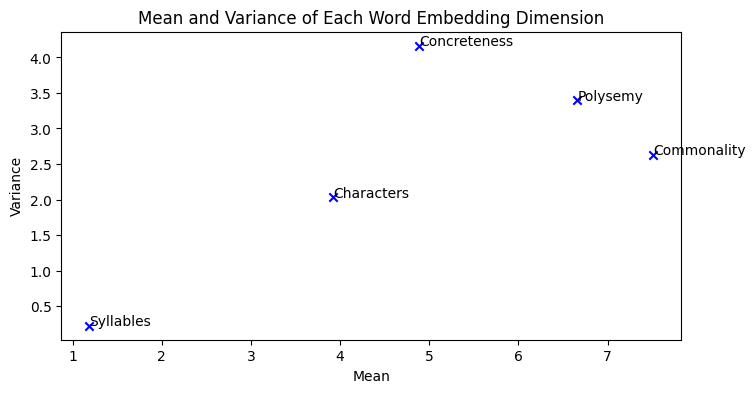

In [131]:
# TODO 2.2.2 Compute and plot statistics
# Select the columns that represent the embeddings
# Select the columns that represent the embeddings
plt.figure(figsize=(8,4))

#calculate mean and variances for each column across all row
mean = np.mean(embeddings, axis = 0)
variances = np.var(embeddings, axis = 0)

#assign color and marker for the scatter plot points
colorname = "blue"
markername = "x"

#scatter plot each column's mean vs. variance
for i in range (len(mean)): 
    xdat = mean[i] 
    ydat = variances[i]
    plt.scatter(xdat, ydat, c=colorname, marker=markername)

    #label each point with dimension name
    plt.text(xdat, ydat, embedding_columns[i])
#label axes and title
plt.xlabel("Mean")
plt.ylabel("Variance")
plt.title("Mean and Variance of Each Word Embedding Dimension")
plt.show()

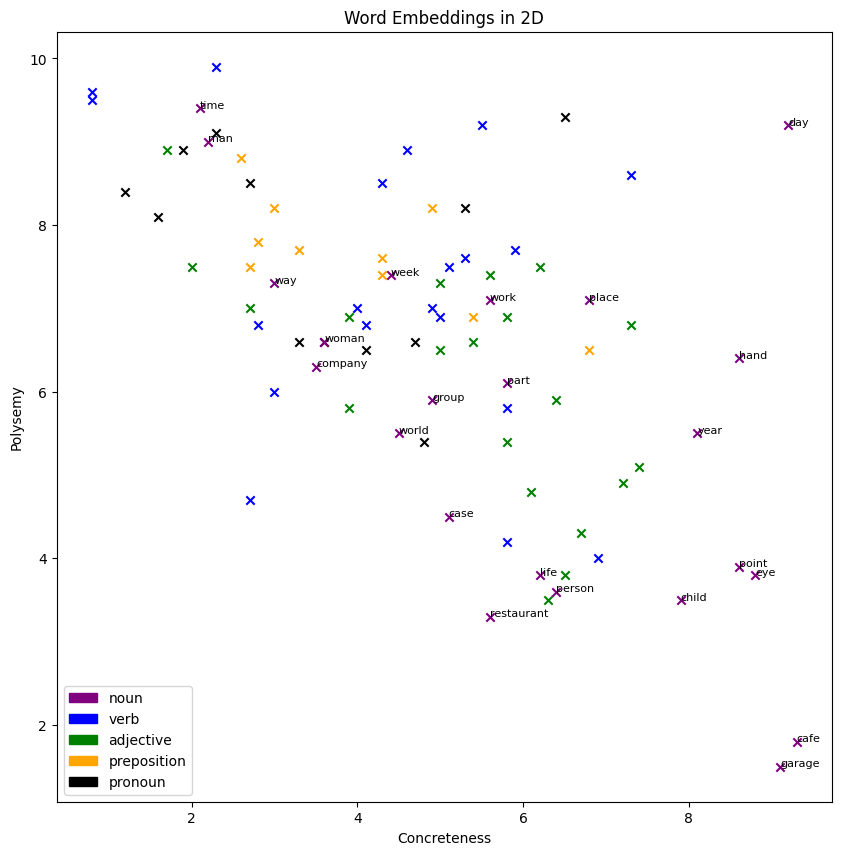

In [116]:
# 2.2.3 Plot word embeddings in 2D

# Create a 10-by-10 figure
plt.figure(figsize=(10, 10))

# TODO: add your code below to make the 2D scatter plot

#loop through each row to plot each word
for i in range(len(df)):
    #assign color based on part of speech
    if df.loc[i,"Part of Speech"] == 'noun':
        color = 'purple'
    elif df.loc[i,"Part of Speech"] == 'verb':
        color = 'blue'
    elif df.loc[i,"Part of Speech"] == 'adjective':
        color = 'green'
    elif df.loc[i,"Part of Speech"] == 'preposition':
        color = 'orange'
    else: 
        color = 'black'
        
    #Plot the point in 2D space with specified color    
    plt.scatter(df.loc[i, "Concreteness"], df.loc[i, "Polysemy"], c=color, marker ='x')

    #label nouns
    if df.loc[i, "Part of Speech"] == 'noun':
        plt.text(df.loc[i, "Concreteness"], df.loc[i,"Polysemy"], df.loc[i, "Word"],fontsize=8)

#label the x, y axes and title
plt.xlabel("Concreteness")
plt.ylabel("Polysemy")
plt.title("Word Embeddings in 2D")
## Create and show legend
legends = [mpatches.Patch(color='purple', label='noun'),
           mpatches.Patch(color='blue', label='verb'),
           mpatches.Patch(color='green', label='adjective'),
           mpatches.Patch(color='orange', label='preposition'),
           mpatches.Patch(color='black', label='pronoun')]
plt.legend(handles=legends)
plt.show()

**TODO:** Describe a relationship that you observe from the 2D scatter plot of the dimensions Concreteness and Polysemy.

**Your answer:** I observe that there appears to be an inverse relationship between concreteness and polysemy for most words. 

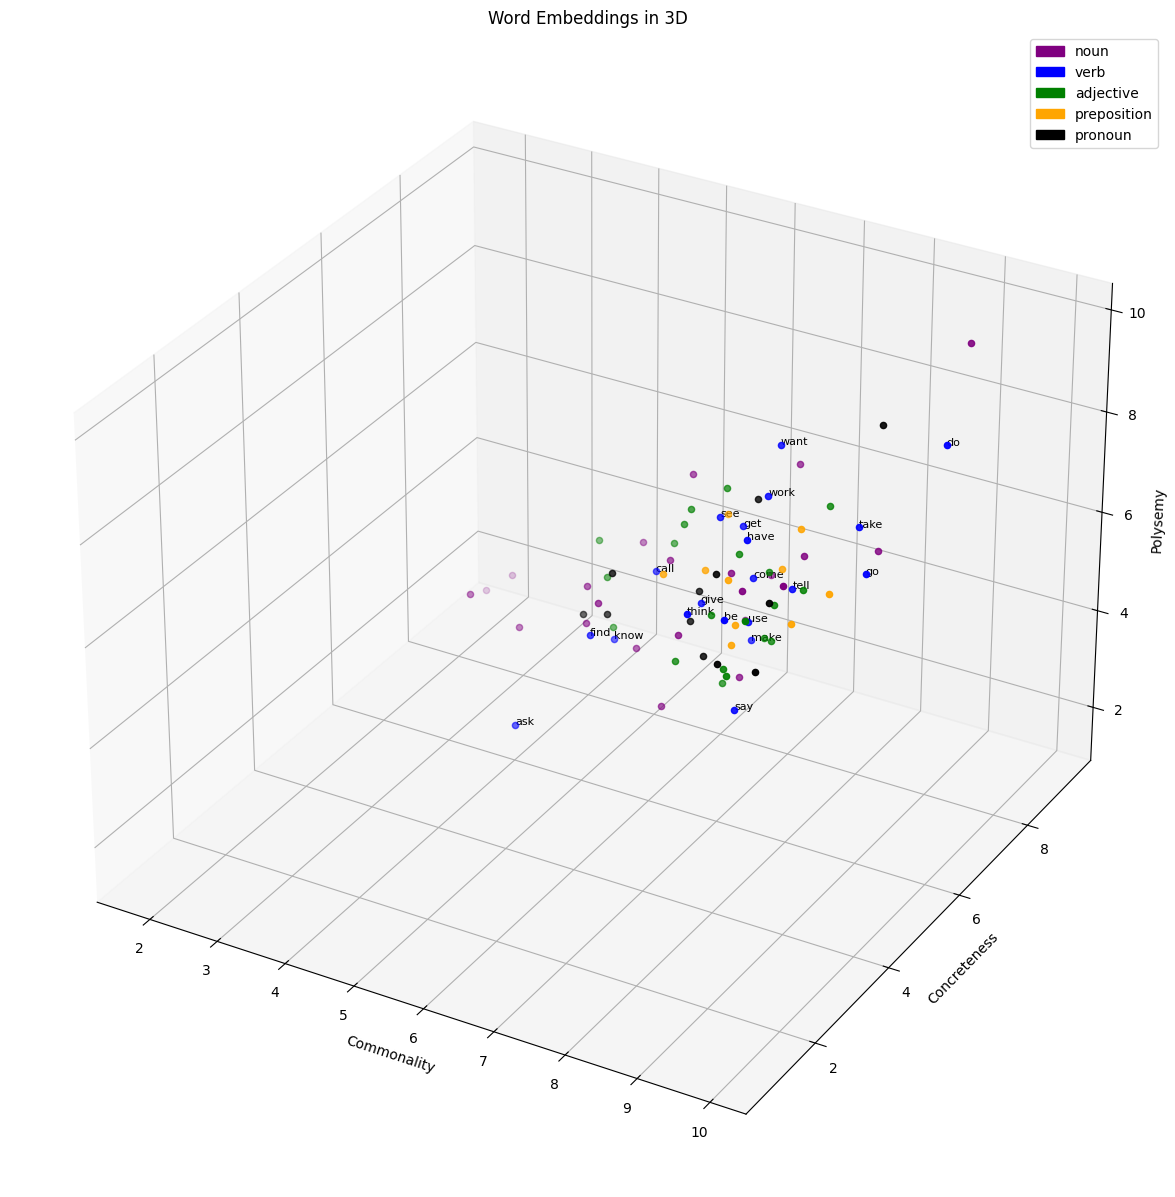

In [132]:
# 2.2.4 Plot word embeddings in 3D

# Create a figure with 3D axes
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

# TODO: add your code below to make the 3D scatter plot

#loop through each row to plot each word
for i in range(len(df)):
    #assign color based on "Part of Speech"
    if df.loc[i,"Part of Speech"] == 'noun':
        color = 'purple'
    elif df.loc[i,"Part of Speech"] == 'verb':
        color = 'blue'
    elif df.loc[i,"Part of Speech"] == 'adjective':
        color = 'green'
    elif df.loc[i,"Part of Speech"] == 'preposition':
        color = 'orange'
    else: 
        color = 'black'
        
    #calculate alphavalue based on normalized Commonality 
    alphavalue = (df.loc[i, "Commonality"] - 0)/(10-0) #normalized to range 0-1
    
    #plot the point in 3D space with specified color and alpha
    ax.scatter(df.loc[i, "Commonality"], df.loc[i, "Concreteness"], df.loc[i,"Polysemy"], c = color, alpha = alphavalue)

    #label verbs
    if df.loc[i,"Part of Speech"] == 'verb':
        ax.text(df.loc[i, "Commonality"], df.loc[i, "Concreteness"], df.loc[i,"Polysemy"], df.loc[i, "Word"], fontsize = 8)

#label the x, y, z axes and title
ax.set_zlabel('Polysemy')
ax.set_xlabel('Commonality')
ax.set_ylabel('Concreteness')
ax.set_title('Word Embeddings in 3D')

# Show legend, re-use the same one made for the 2D scatter plot above
ax.legend(handles=legends)
plt.show()